In [46]:
import pandas as pd

# Read raw lines from file
with open("ble_latency.csv", "r") as file:
    lines = file.readlines()

# Parse each line and extract values
data = []
for line in lines:
    if ":" in line:
        index_part, value_part = line.strip().split(":")
        index = int(index_part.strip())
        latency_us = int(value_part.strip().replace("us", "").strip())
        data.append((index, latency_us))

# Create DataFrame
df = pd.DataFrame(data, columns=["Index", "Latency_us"])
df["Latency_ms"] = df["Latency_us"] / 1000  # Convert to ms

# Preview
print(df.head())


   Index  Latency_us  Latency_ms
0      1       28032      28.032
1      2       23053      23.053
2      3       36520      36.520
3      4       25557      25.557
4      5       35958      35.958


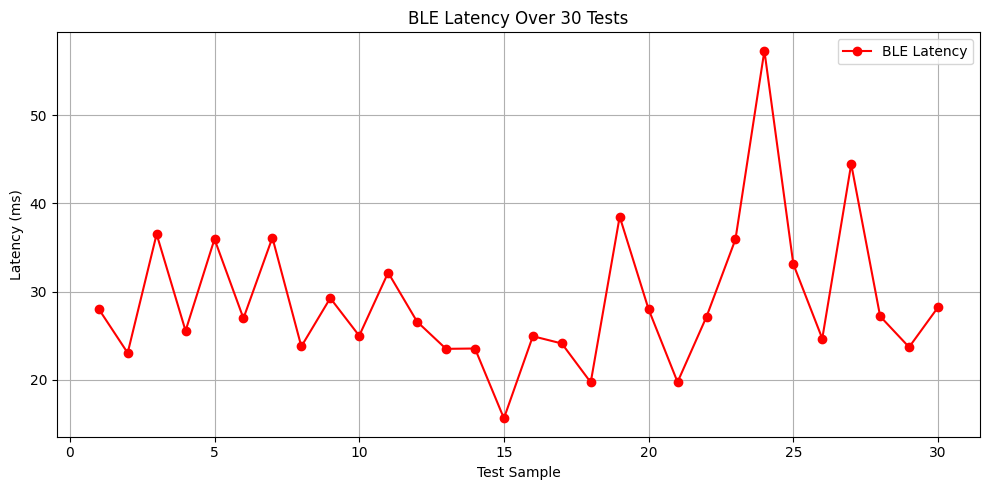

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot with label
plt.plot(df["Index"], df["Latency_ms"], marker='o', linestyle='-', color='red', label="BLE Latency")

# Add title and labels
plt.title("BLE Latency Over 30 Tests")
plt.xlabel("Test Sample")
plt.ylabel("Latency (ms)")

# Add grid and legend
plt.grid(True)
plt.legend(loc="upper right")  

plt.tight_layout()
plt.show()


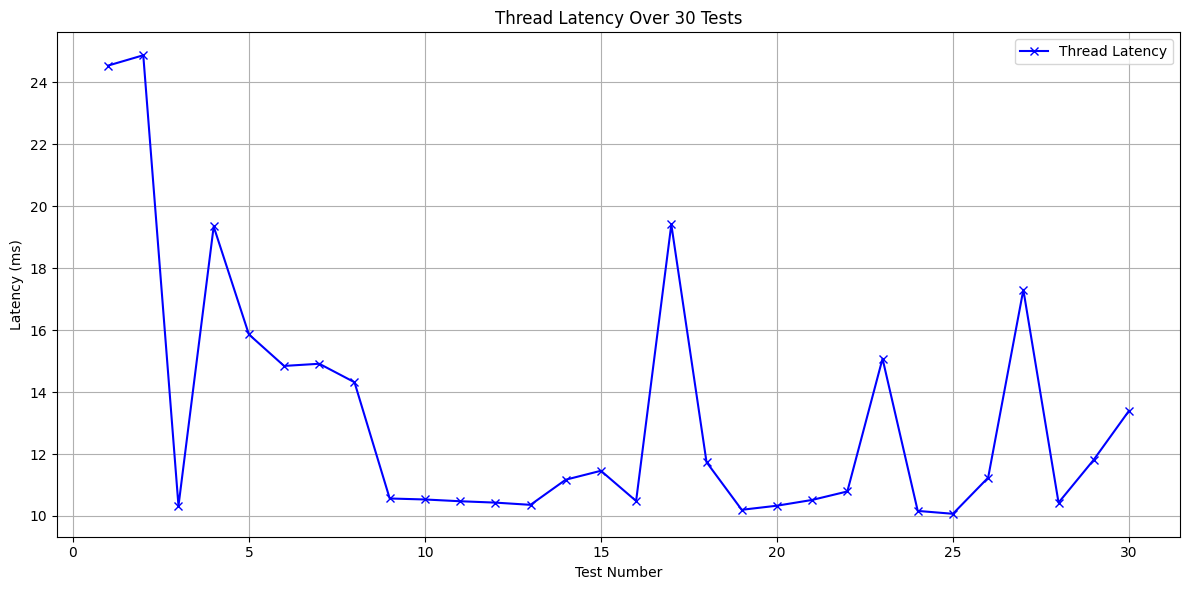

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load thread latency from Excel, skipping the first row, no header
df = pd.read_excel("thread.xlsx", sheet_name="Sheet1", skiprows=1, header=None)

# Extract Column E (index 4), drop any missing values
latency_ms = df.iloc[:, 4].dropna().tolist()

# Create test numbers 1–30
test_numbers = list(range(1, len(latency_ms) + 1))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_numbers, latency_ms, marker='x', linestyle='-', color='blue', label="Thread Latency")
plt.title("Thread Latency Over 30 Tests")
plt.xlabel("Test Number")
plt.ylabel("Latency (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


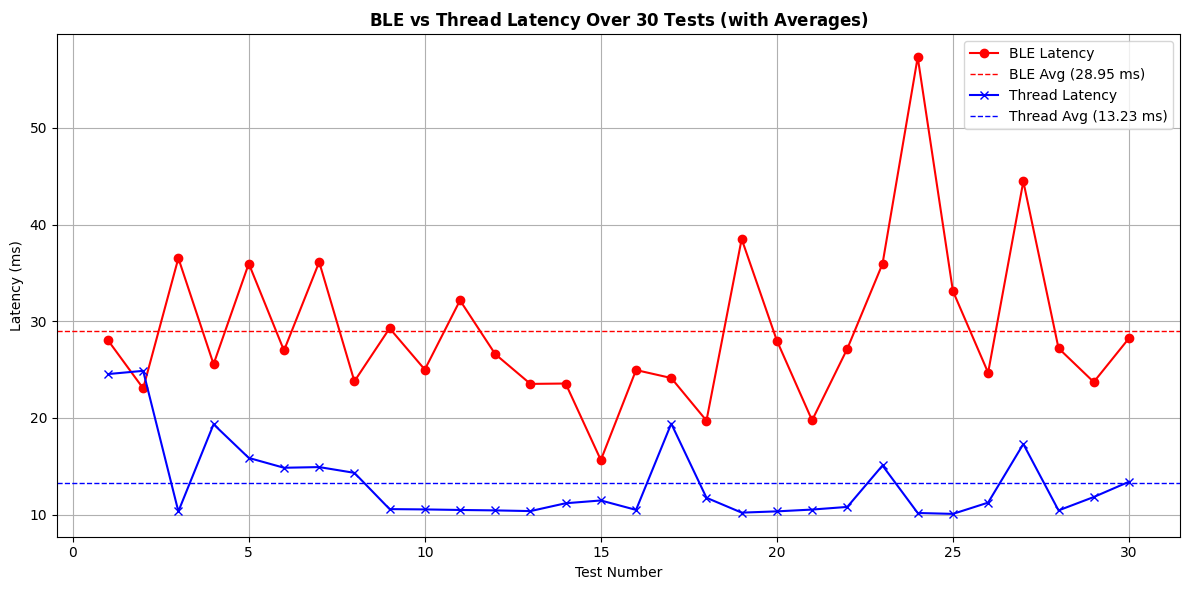

In [50]:
import numpy as np

# --- Load BLE latency ---
ble_data = []
with open("ble_latency.csv", "r") as file:
    for line in file:
        if ":" in line:
            _, value = line.strip().split(":")
            latency_us = int(value.replace("us", "").strip())
            ble_data.append(latency_us / 1000)  # Convert to ms

# --- Load Thread latency ---
thread_df = pd.read_excel("thread.xlsx", sheet_name="Sheet1", skiprows=1, header=None)
thread_data = thread_df.iloc[:, 4].dropna().tolist()

# --- Sync both to same test count ---
test_count = min(len(ble_data), len(thread_data))
test_numbers = list(range(1, test_count + 1))
ble_data = ble_data[:test_count]
thread_data = thread_data[:test_count]

# --- Averages
ble_avg = np.mean(ble_data)
thread_avg = np.mean(thread_data)

# --- Plot
plt.figure(figsize=(12, 6))

# BLE in red
plt.plot(test_numbers, ble_data, marker='o', linestyle='-', color='red', label="BLE Latency")
plt.axhline(ble_avg, color='red', linestyle='--', linewidth=1, label=f"BLE Avg ({ble_avg:.2f} ms)")

# Thread in blue
plt.plot(test_numbers, thread_data, marker='x', linestyle='-', color='blue', label="Thread Latency")
plt.axhline(thread_avg, color='blue', linestyle='--', linewidth=1, label=f"Thread Avg ({thread_avg:.2f} ms)")

# Labels and styling
plt.title(r"$\mathbf{BLE\ vs\ Thread\ Latency\ Over\ 30\ Tests\ (with\ Averages)}$")
plt.xlabel("Test Number")
plt.ylabel("Latency (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


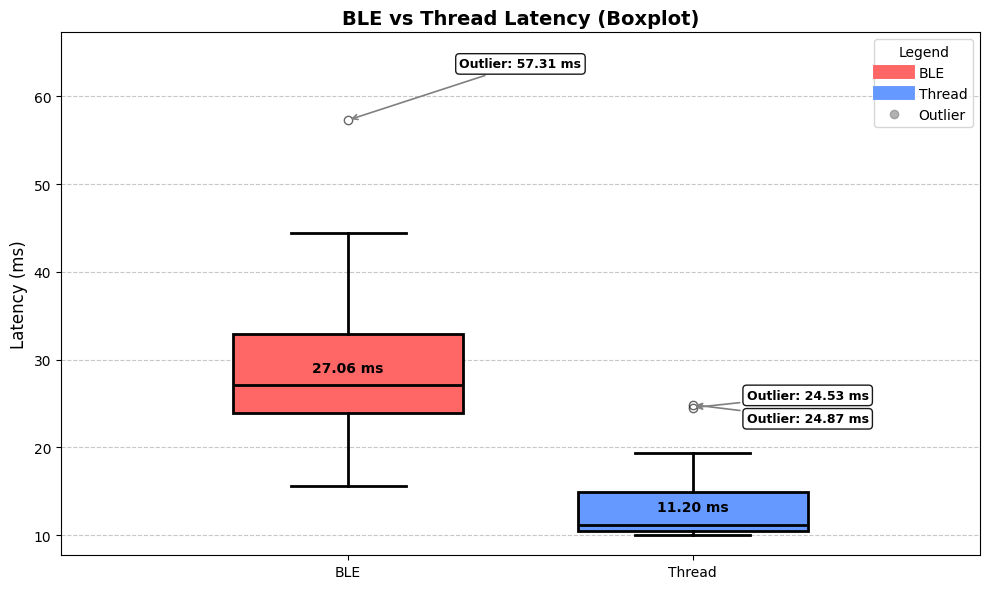

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load BLE latency ---
ble_data = []
with open("ble_latency.csv", "r") as file:
    for line in file:
        if ":" in line:
            _, value = line.strip().split(":")
            latency_us = int(value.replace("us", "").strip())
            ble_data.append(latency_us / 1000)  # Convert to ms

# --- Load Thread latency ---
thread_df = pd.read_excel("thread.xlsx", sheet_name="Sheet1", skiprows=1, header=None)
thread_data = thread_df.iloc[:, 4].dropna().tolist()

# --- Boxplot setup ---
fig, ax = plt.subplots(figsize=(10, 6))
box_colors = ['#FF6666', '#6699FF']
positions = [1, 1.6]

# Create boxplot
box = ax.boxplot([ble_data, thread_data],
                 patch_artist=True,
                 positions=positions,
                 widths=0.4,
                 labels=["BLE", "Thread"],
                 medianprops=dict(color='black', linewidth=2),
                 boxprops=dict(linewidth=2),
                 whiskerprops=dict(linewidth=2),
                 capprops=dict(linewidth=2),
                 flierprops=dict(marker='o', color='gray', alpha=0.6, markersize=6))

# Fill box colors
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)

# Add median labels
medians = [np.median(ble_data), np.median(thread_data)]
for i, median in enumerate(medians):
    ax.text(positions[i], median + 1.5, f"{median:.2f} ms", ha='center', fontweight='bold', fontsize=10)

# Set y-limit so annotations fit
max_y = max(max(ble_data), max(thread_data)) + 10
ax.set_ylim(top=max_y)

# Annotate visible outliers neatly
fliers = box['fliers']
for i, flier in enumerate(fliers):
    for j, y in enumerate(flier.get_ydata()):
        # For BLE (i==0) use an offset to the right (0.3)
        # For Thread (i==1) use a smaller offset to the right (0.2)
        offset_x = 0.3 if i == 0 else 0.2
        offset_y = 6 + (j * 3 if i == 0 else -5 - j * 3)
        ax.annotate(f"Outlier: {y:.2f} ms",
                    xy=(positions[i], y),
                    xytext=(positions[i] + offset_x, y + offset_y),
                    arrowprops=dict(arrowstyle="->", color='gray', lw=1.2),
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.9),
                    fontsize=9, fontweight='bold', color='black',
                    ha='center', clip_on=True)

# Add custom legend
legend_patches = [
    plt.Line2D([0], [0], color=box_colors[0], lw=10, label='BLE'),
    plt.Line2D([0], [0], color=box_colors[1], lw=10, label='Thread'),
    plt.Line2D([0], [0], marker='o', color='gray', linestyle='None', label='Outlier', markersize=6, alpha=0.6)
]
ax.legend(handles=legend_patches, loc='upper right', title="Legend", fontsize=10)

# Titles and styling
ax.set_title("BLE vs Thread Latency (Boxplot)", fontsize=14, fontweight='bold')
ax.set_ylabel("Latency (ms)", fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


🔴 BLE Latency (ms)
Q1 (25th percentile): 10.44

Q3 (75th percentile): 14.89

IQR: 4.45

Lower Bound: 3.77

Upper Bound: 21.57

➡️ Any value > 21.57 ms is considered an outlier
✅ So BLE has several outliers like 24.53, 24.87, etc.

🔵 Thread Latency (ms)
Q1 (25th percentile): 24.50

Q3 (75th percentile): 35.50

IQR: 11.00

Lower Bound: 8.00

Upper Bound: 52.00

➡️ Only values > 52.00 ms are outliers
✅ So 57.0 ms is flagged as an outlier in Thread.

Thread protocol consistently performs faster and more stable than BLE.
The median latency for Thread (~11.20 ms) is less than half of BLE (~27.06 ms).

🔴 BLE shows more variability, with a wider interquartile range and a few extreme high-latency outliers (up to ~57 ms), which could affect responsiveness.

🔵 Thread’s latency is tightly clustered, showing reliable performance even in repeated tests — ideal for low-latency applications like fan control or sensor data.

 Key Insights:
Thread protocol consistently performs faster and more stable than BLE.

📉 Median Latency:

Thread: ~11.21 ms
BLE: ~28.00 ms
→ Thread is over 2× faster.
